In [1]:
# GOAL
# how to use logistic regression to solve lassification problems
# interpret the results of lr to read confusion matrix


# lr - method for Bianary classification (0/1)

# why not using linear regression on this?
# Bad fit!


# In the case below, 0.5 is a 'cutoff point', where value goes above or under will be classified in accordance

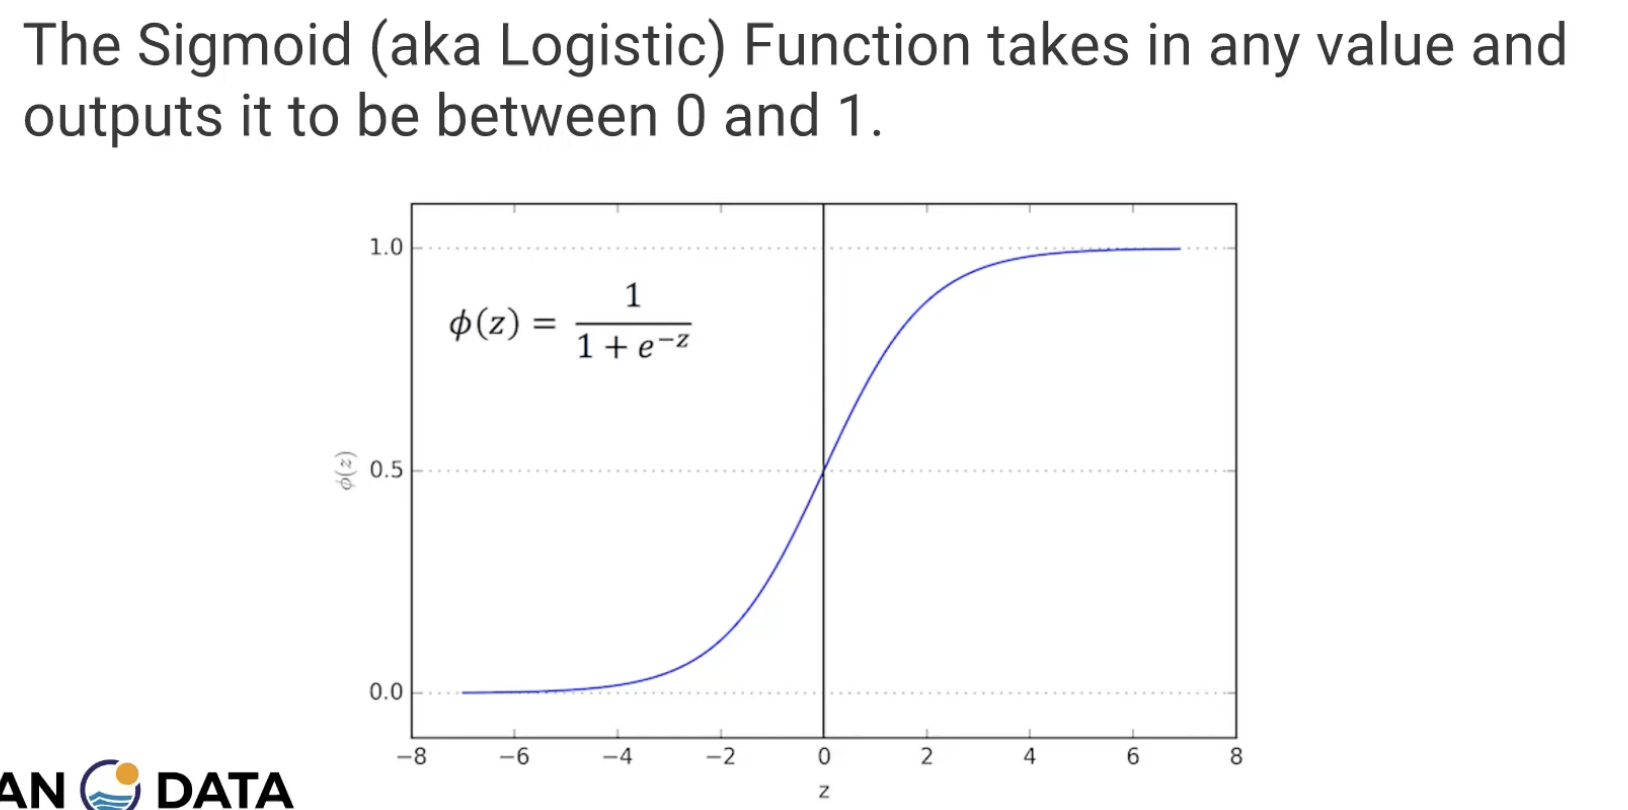

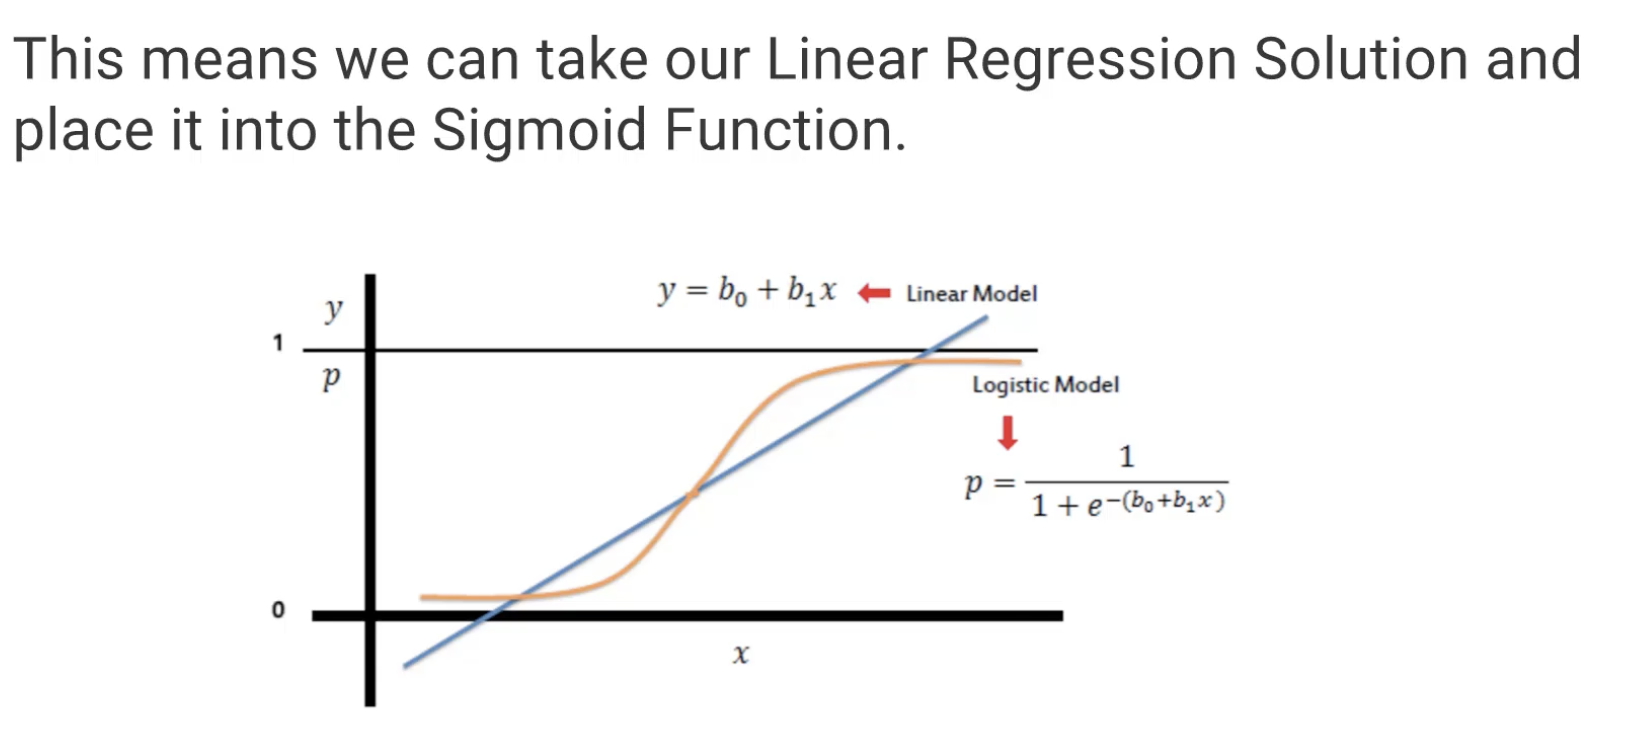

# Confusion matrix
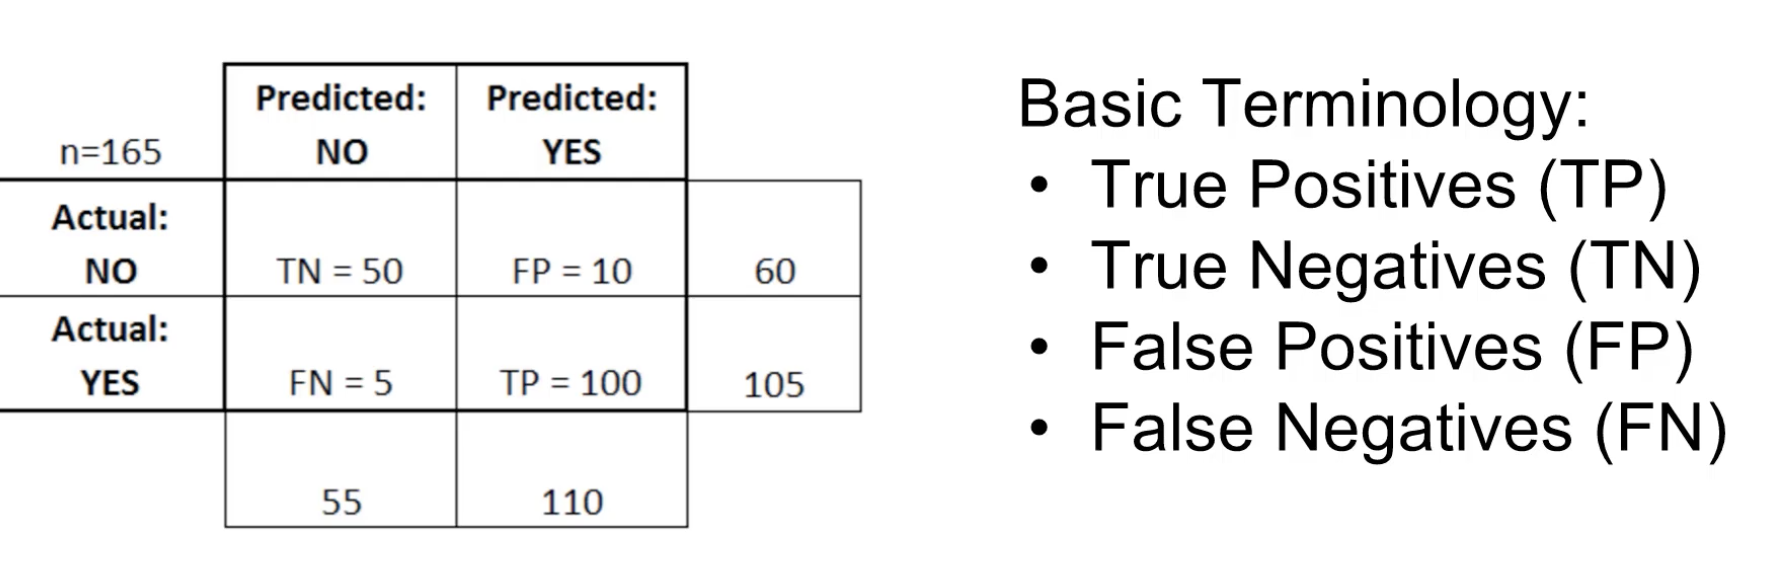

In [2]:
# Type I ERROR = False Positive
# Type II ERROR = Fasle Negative

# Accuracy: (TP + TN) / total 
# Misclassification Rate (error rate): (FP + FN) / total

*****

# Titanic Data Mining - Predict the survival of individual passagers
## Exploring the data

In [3]:
# Q: Analyze the titanic data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


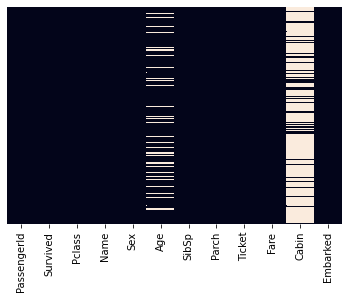

In [5]:
# See the missing data

# train.isnull() !!!!

sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [6]:
sns.set_style('whitegrid')

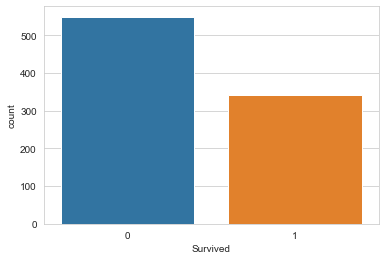

In [7]:
sns.countplot(x='Survived', data=train)

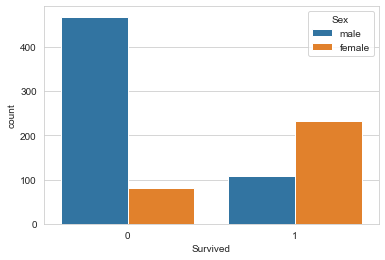

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex')

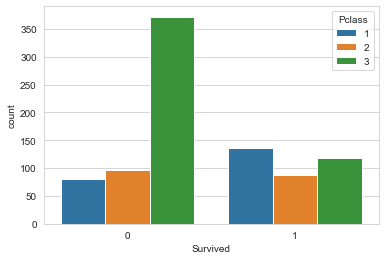

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass')

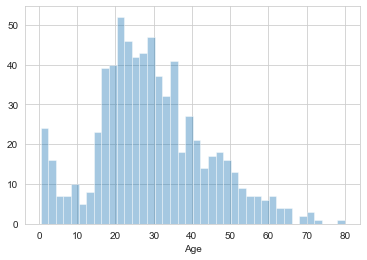

In [10]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

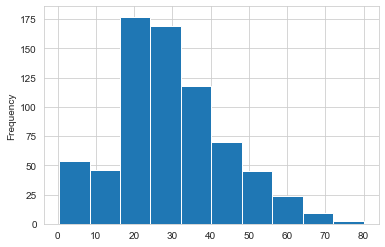

In [11]:
train['Age'].plot.hist(bins=10)

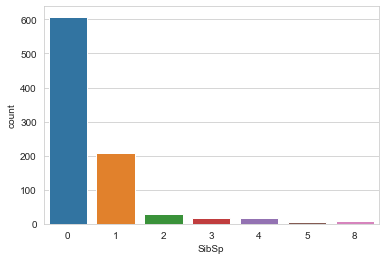

In [12]:
# Sibolins
sns.countplot(data=train, x='SibSp')

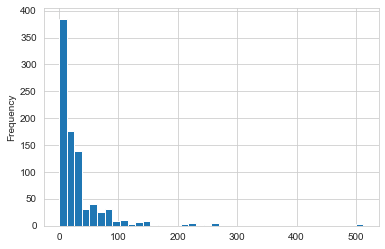

In [13]:
# plt.hist(train['Fare'], bins=40)
train['Fare'].plot.hist(bins=40)

In [14]:
# Use cufflinks
import cufflinks as cf
cf.go_offline()

In [15]:
# pandas.iplot uses cufflinks under the hood. iplot stands for interactive plot.
# train['Fare'].iplot(kind='hist',bins=30)


## Clean the data

In [16]:
# plt.figure(figsize=(10,10))
# sns.boxplot(x='Pclass', y='Age',data=train)
print(train[train['Pclass'] == 3]['Age'].dropna().mean())
print(train[train['Pclass'] == 2]['Age'].dropna().mean())
train[train['Pclass'] == 1]['Age'].dropna().mean()

25.14061971830986
29.87763005780347


38.233440860215055

In [17]:
arr = [25.14061971830986, 29.87763005780347, 38.233440860215055]
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        return arr[int(Pclass)-1]
    else:
        return Age

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

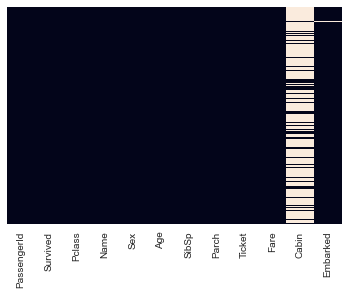

In [19]:
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False)

In [20]:
train.drop('Cabin', axis=1, inplace=True)

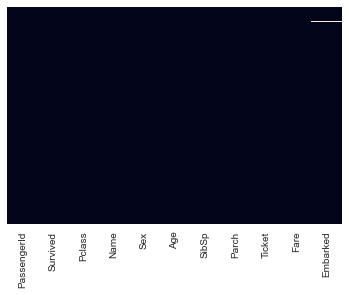

In [21]:
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False)

In [22]:
train.dropna(inplace=True)

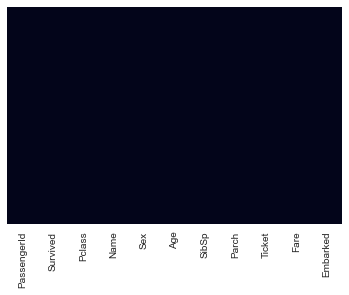

In [23]:
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False)

In [24]:
# creation of dummy variable - make columns (that were unable to be proceeded by ml 
#   models such as columns contain string or other values) to integer representation or etc.
#     to avoid multi-collinearity


sex = pd.get_dummies(train['Sex'], drop_first=True)


In [25]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [26]:
train = pd.concat([train,sex,embark],axis=1)

In [27]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [28]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [29]:
# train.head(3)
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.000000,0,0,13.00,1,0,1
887,888,1,1,19.000000,0,0,30.00,0,0,1
888,889,0,3,38.233441,1,2,23.45,0,0,1
889,890,1,1,26.000000,0,0,30.00,1,0,0
890,891,0,3,32.000000,0,0,7.75,1,1,0


In [30]:
train.drop('PassengerId', axis=1, inplace=True)

In [31]:
# HOW ML will react if the column is treated as a dummy / leave as a catogorical numerical value

## Training

In [48]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
log = LogisticRegression(max_iter=1000)

In [92]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
p = log.predict(x_test)

## Evaluate

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [105]:
from sklearn.metrics import confusion_matrix

In [106]:
confusion_matrix(y_test, p)

array([[148,  15],
       [ 34,  70]])

In [ ]:
# Increase precision / recall / accuracy?
#  1. Use entire train.csv dataset vs. test.csv dataset. Remember to clean the data on both.
#  2. Grab the title of the name / position / tickit to further extend the information about the passager and predict 
#      the possibility to survive more accurately (maybe) with more information